In [2]:
from itertools import combinations, combinations_with_replacement, product

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from Bio.SeqIO import parse

from regex_classifier import RegexGeneticEnsembleClassifier

In [3]:
# create the components for regular expression
bases = []
for i in (1, 2, 3, 4):
    bases += ['[' + ''.join(b) + ']' for b in combinations('ACGT', i)]
sizes = ['{{{:d},{:d}}}?'.format(*x) for x in combinations_with_replacement(
            range(1, 5), 2)]
components = [b + s for b, s in product(bases, sizes)]
# add empty string
components.append('')

In [4]:
training_seqs = []
labels = []
with open('../g4seq_cnn/KPDS_training_data.fa') as f:
    for record in parse(f, 'fasta'):
        labels.append(int(record.id))
        training_seqs.append(str(record.seq).upper())

In [5]:
r = RegexGeneticEnsembleClassifier(
    regex_components=components,
    n_pops=25, pop_size=1000, n_gen=1000, n_best=1,
    ind_len=15, n_selected=500, n_offspring=200,
    batch_size=1000, early_stopping=5)

In [ ]:
r.fit(training_seqs, labels)

In [175]:
r.score(training_seqs[-1000:], labels[-1000:])

0.95499999999999996

In [176]:
roc_auc_score(labels[-1000:], r.predict_proba(training_seqs[-1000:])[:, 1])

0.98079500678250753

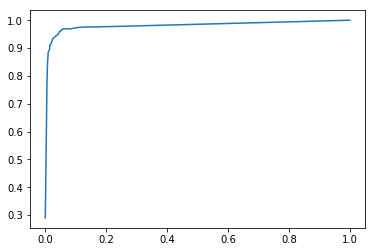

In [177]:
fpr, tpr, _ = roc_curve(labels[-1000:],
                        r.predict_proba(training_seqs[-1000:])[:, 1])
plt.plot(fpr, tpr)
plt.show()